In [469]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

sigma =  37.7*1e6 #S/m
c = 3 * 1e8
er = 1
eta = 120 * math.pi / math.sqrt(er)
v = 3 * 1e8 / math.sqrt(er)
mu = 4 * math.pi * 1e-7


In [470]:
a = 40*1e-3
b = 20*1e-3

In [471]:
fc_TE = lambda m, n, a, b: (v / (2 * math.pi)) * math.sqrt((m * math.pi / a) ** 2 + (n * math.pi / b) ** 2) #con a y b en mm
fc_TM = lambda m, n, a, b: (v / (2 * math.pi)) * math.sqrt((m * math.pi / a) ** 2 + (n * math.pi / b) ** 2) #con a y b en mm
frec = []
for n in range(0, 4):
    for m in range(0, 4):
        if not (n == 0 and m == 0):
            frec.append((m, n, "TE", round(fc_TE(m, n, a, b) * 1e-9, 2)))
for n in range(1, 4):
    for m in range(1, 4):
        frec.append((m, n, "TM", round(fc_TM(m, n, a, b) * 1e-9, 2)))
frec = sorted(frec, key=lambda x: x[3], reverse=False)
for i in range (0,14):
    print(" Modo {}{}{} con una fc = {}GHz".format(frec[i][2], frec[i][0], frec[i][1], frec[i][3]))

 Modo TE10 con una fc = 3.75GHz
 Modo TE20 con una fc = 7.5GHz
 Modo TE01 con una fc = 7.5GHz
 Modo TE11 con una fc = 8.39GHz
 Modo TM11 con una fc = 8.39GHz
 Modo TE21 con una fc = 10.61GHz
 Modo TM21 con una fc = 10.61GHz
 Modo TE30 con una fc = 11.25GHz
 Modo TE31 con una fc = 13.52GHz
 Modo TM31 con una fc = 13.52GHz
 Modo TE02 con una fc = 15.0GHz
 Modo TE12 con una fc = 15.46GHz
 Modo TM12 con una fc = 15.46GHz
 Modo TE22 con una fc = 16.77GHz


In [472]:
k = lambda f_: math.sqrt(er)*2*math.pi*f_*1e9/v
beta = lambda fc_,f_, k_: k_*cmath.sqrt(1 - (fc_/f_)**2)
Rs = lambda f_: math.sqrt((2*math.pi*f_*1e9*mu)/(2*sigma))
Nfx = lambda x: 1 if x == 0 else 2
alfa_c_TE = lambda Rs, k, beta, m, n: (Rs/(k*beta*eta)) * ( ( (k**2 - beta**2) * ((Nfx(n)/a) + (Nfx(m)/b)) ) + (beta**2 * (Nfx(n)*Nfx(m)/2) * (b*(n*a)**2 + a*(b*m)**2)/(b*(n**2)*(a**3) + (m**2)*(b**3)*a)))
alfa_c_TM = lambda Rs, k, beta, m, n: (2*Rs*k/(beta*eta)) * ( ((n**2)*(a**3) + (m**2)*(b**3)) / ((n**2)*(a**3)*b + (m**2)*(b**3)*a) )

Grafico $\alpha_c$ para el modo $TE_{10}$

In [473]:
f_x = np.linspace(2,15,10000)
alfa_c_TE10 = []
for f_ in f_x:
    k_x = k(f_)
    beta_x = beta(fc_TE(1,0,a,b)*1e-9,f_,k_x)
    if beta_x.imag < 0.000001:
        Rs_x = Rs(f_)
        alfa_c_x = alfa_c_TE(Rs_x, k_x, beta_x, 1, 0)
        alfa_c_TE10.append(alfa_c_TE(Rs_x, k_x, beta_x, 1, 0).real/8.685889638)
    else:
        alfa_c_TE10.append(10000000000)

Grafico $\alpha_c$ para el modo $TE_{01}$

In [474]:
f_x = np.linspace(2,15,10000)
alfa_c_TE01 = []
for f_ in f_x:
    k_x = k(f_)
    beta_x = beta(fc_TE(0,1,a,b)*1e-9,f_,k_x)
    if beta_x.imag < 0.000001:
        Rs_x = Rs(f_)
        alfa_c_x = alfa_c_TE(Rs_x, k_x, beta_x, 0, 1)
        alfa_c_TE01.append(alfa_c_TE(Rs_x, k_x, beta_x, 0, 1).real/8.685889638)
    else:
        alfa_c_TE01.append(10000000000)
print(alfa_c_TE01)

[10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000

Grafico $\alpha_c$ para el modo $TE_{11}$


In [475]:
f_x = np.linspace(2,15,10000)
alfa_c_TE11 = []
for f_ in f_x:
    k_x = k(f_)
    beta_x = beta(fc_TE(1,1,a,b)*1e-9,f_,k_x)
    if beta_x.imag < 0.000001:
        Rs_x = Rs(f_)
        alfa_c_x = alfa_c_TE(Rs_x, k_x, beta_x, 1, 1)
        alfa_c_TE11.append(alfa_c_TE(Rs_x, k_x, beta_x, 1, 1).real/8.685889638)
    else:
        alfa_c_TE11.append(10000000000)
print(alfa_c_TE11)

[10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000

Grafico $\alpha_c$ para el modo $TM_{11}$

In [476]:
f_x = np.linspace(2,15,10000)
alfa_c_TM11 = []
for f_ in f_x:
    k_x = k(f_)
    beta_x = beta(fc_TM(1,1,a,b)*1e-9,f_,k_x)
    if beta_x.imag < 0.000001:
        Rs_x = Rs(f_)
        alfa_c_x = alfa_c_TE(Rs_x, k_x, beta_x, 1, 1)
        alfa_c_TM11.append(alfa_c_TM(Rs_x, k_x, beta_x, 1, 1).real/8.685889638)
    else:
        alfa_c_TM11.append(10000000000)
print(alfa_c_TM11)

[10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000

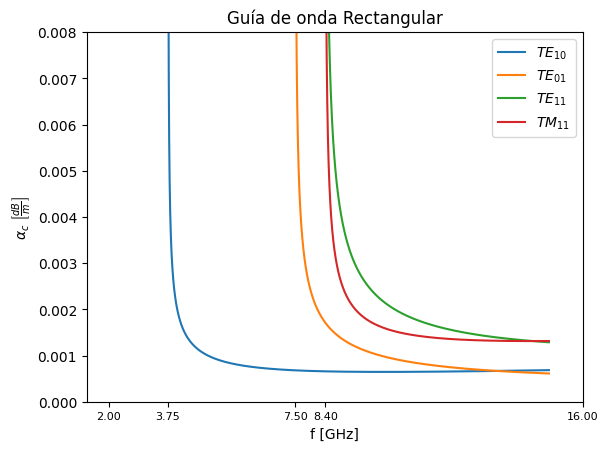

In [477]:
plt.plot(f_x, alfa_c_TE10, label = r"$TE_{10}$")
plt.plot(f_x, alfa_c_TE01, label = r"$TE_{01}$")
plt.plot(f_x, alfa_c_TE11, label = r"$TE_{11}$")
plt.plot(f_x, alfa_c_TM11, label = r"$TM_{11}$")
plt.ylim([0,0.008])
plt.title("Guía de onda Rectangular")
plt.xticks([2, 3.75, 7.5, 8.4, 16], fontsize=8)
plt.xlabel("f [GHz]")
plt.ylabel(r"$\alpha_c$ $\left [ \frac{dB}{m}\right ]$")
plt.legend()
plt.savefig("Ej4-Guía rectangular", dpi=200)
plt.show()